In [1]:
from typing import List
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import os
import gzip
from tqdm import tqdm
import seaborn as sns
import natsort
from scipy.signal import savgol_filter
import hashlib

In [2]:
#  read csv files from the folder
#  read csv files from the folder
def read_csv_files(folder_path: str):
    """
    Read all csv files from the folder and return a list of dataframes
    :param folder_path: path to the folder with csv files
    :return: list of dataframes
    """
    all_files = glob.glob(folder_path + "/*.csv")
    li = []
    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, header=0)
        li.append(df)
    return li

In [3]:
folder_path = "C:/PhD/experiments/fish_experiments/FishSizeKinematics/data/"

In [4]:
desired_cols= ['framenumber']

In [5]:
os.listdir(folder_path)
os.listdir(folder_path)[1]
for x, y in enumerate(os.listdir(folder_path)):
    print(x,y)


0 0712vr3_1_112_a28.csv
1 0712vr3_2_112_a28.csv
2 0712vr3_3_112_a28.csv
3 0712vr3_4_112_a28.csv
4 0712vr4_1_099_a28.csv
5 0712vr4_2_099_a28.csv
6 0712vr4_3_099_a28.csv
7 0712vr4_4_099_a28.csv
8 0712vr5_1_064_a28.csv
9 0712vr5_2_064_a28.csv
10 0712vr5_3_064_a28.csv
11 0712vr5_4_064_a28.csv
12 0712vr6_1_084_a28.csv
13 0712vr6_2_084_a28.csv
14 0712vr6_3_084_a28.csv
15 0712vr6_4_084_a28.csv
16 1012vr3_1_127_a30.csv
17 1012vr3_2_127_a30.csv
18 1012vr3_3_127_a30.csv
19 1012vr3_4_127_a30.csv
20 1012vr5_1_104_a30.csv
21 1012vr5_2_104_a30.csv
22 1012vr5_3_104_a30.csv
23 1012vr5_4_104_a30.csv
24 1012vr6_1_112_a30.csv
25 1012vr6_2_112_a30.csv
26 1012vr6_3_112_a30.csv
27 1012vr6_4_112_a30.csv
28 2711vr3_1_112_a25.csv
29 2711vr3_2_112_a25.csv
30 2711vr3_3_112_a25.csv
31 2711vr3_4_112_a25.csv
32 2711vr4_1_051_a25.csv
33 2711vr4_2_051_a25.csv
34 2711vr4_3_051_a25.csv
35 2711vr4_4_051_a25.csv
36 2711vr5_1_057_a25.csv
37 2711vr5_2_057_a25.csv
38 2711vr5_3_057_a25.csv
39 2711vr5_4_057_a25.csv
40 2711vr6

In [14]:
#  read only desired columns of files from folder path
count_10_all = {}
count_2_all = {}
fish_sz = {}
session = {}
for filenum, filename in enumerate(os.listdir(folder_path)):
    # print(filenum, filename)
    # print(os.listdir(folder_path)[filenum[0]])
    if filename.endswith(".csv"):
        df = pd.read_csv(os.path.join(folder_path, filename), usecols=desired_cols)
        count_10 = np.sum(df['framenumber'].diff() > 10)
        count_2 = np.sum(df['framenumber'].diff() > 2)
        print(filename, count_10, count_2)  # print the file name and the number of frames with a gap of 10 and 2
        count_10_all[filenum] = count_10
        count_2_all[filenum] = count_2
        fish_size = filename.split('_')[2]
        temp_fish_sz = int(fish_size)
        fish_sz[filenum] = temp_fish_sz
        session[filenum] = filename.split('_')[1]

    plot_df = pd.DataFrame([count_10_all, count_2_all, fish_sz, session], index=['count_10_all', 'count_2_all', 'fish_sz', 'session']).T

0712vr3_1_112_a28.csv 156 256
0712vr3_2_112_a28.csv 335 389
0712vr3_3_112_a28.csv 372 423
0712vr3_4_112_a28.csv 306 359
0712vr4_1_099_a28.csv 13 117
0712vr4_2_099_a28.csv 6 114
0712vr4_3_099_a28.csv 3 126
0712vr4_4_099_a28.csv 6 118
0712vr5_1_064_a28.csv 63 150
0712vr5_2_064_a28.csv 70 202
0712vr5_3_064_a28.csv 63 137
0712vr5_4_064_a28.csv 55 128
0712vr6_1_084_a28.csv 9 127
0712vr6_2_084_a28.csv 18 109
0712vr6_3_084_a28.csv 19 121
0712vr6_4_084_a28.csv 9 134
1012vr3_1_127_a30.csv 0 0
1012vr3_2_127_a30.csv 0 0
1012vr3_3_127_a30.csv 0 0
1012vr3_4_127_a30.csv 0 0
1012vr5_1_104_a30.csv 51 133
1012vr5_2_104_a30.csv 71 157
1012vr5_3_104_a30.csv 70 151
1012vr5_4_104_a30.csv 88 165
1012vr6_1_112_a30.csv 62 167
1012vr6_2_112_a30.csv 51 133
1012vr6_3_112_a30.csv 28 116
1012vr6_4_112_a30.csv 34 130
2711vr3_1_112_a25.csv 66 153
2711vr3_2_112_a25.csv 121 217
2711vr3_3_112_a25.csv 166 259
2711vr3_4_112_a25.csv 216 291
2711vr4_1_051_a25.csv 156 219
2711vr4_2_051_a25.csv 287 341
2711vr4_3_051_a25.csv 

In [15]:
plot_df

,count_10_all,count_2_all,fish_sz,session
0,156,256,112,1
1,335,389,112,2
2,372,423,112,3
3,306,359,112,4
4,13,117,99,1
...,...,...,...,...
87,101,174,71,4
88,20,109,79,1
89,4,125,79,2
90,13,120,79,3


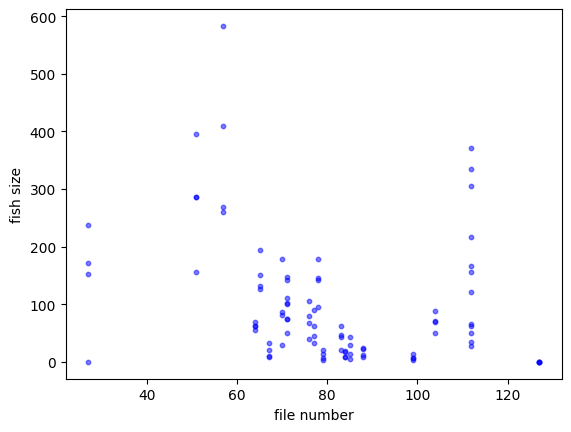

In [25]:
fig= plt.figure()
plt.scatter(plot_df['fish_sz'], plot_df['count_10_all'], 10, c='b', label='gap > 10', alpha=0.5)
plt.xlabel('file number')
plt.ylabel('fish size')
plt.show()

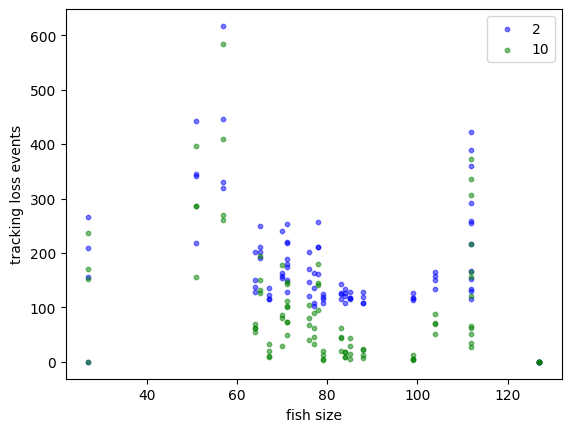

In [27]:
fig= plt.figure()
plt.scatter(plot_df['fish_sz'], plot_df['count_2_all'], 10, c='b', label='gap > 2', alpha=0.5)
plt.scatter(plot_df['fish_sz'], plot_df['count_10_all'], 10, c='g', label='gap > 10', alpha=0.5)
plt.legend(['2', '10'])
plt.xlabel('fish size')
plt.ylabel('tracking loss events')
plt.show()


In [36]:
unique_sessions = plot_df['session'].unique()
unique_fish = plot_df['fish_sz'].unique()

In [60]:
fish_by_session = plot_df.groupby(['session', 'fish_sz'])['count_2_all', 'count_10_all'].sum().reset_index()

C:\Users\kkumari\AppData\Local\Temp\ipykernel_37916\288804295.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  fish_by_session = plot_df.groupby(['session', 'fish_sz'])['count_2_all', 'count_10_all'].sum().reset_index()


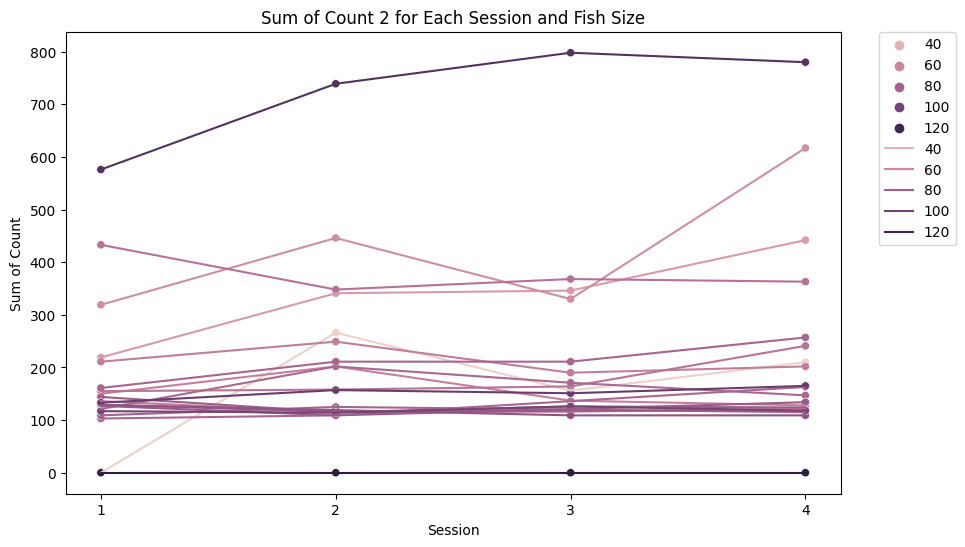

In [63]:
# Plotting
fig= plt.figure(figsize=(10, 6))
sns.scatterplot(x='session', y='count_2_all', hue='fish_sz', data=fish_by_session)
sns.lineplot(x='session', y='count_2_all', hue='fish_sz', data=fish_by_session)
plt.title('Sum of Count 2 for Each Session and Fish Size')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Session')
plt.ylabel('Sum of Count')
plt.show()


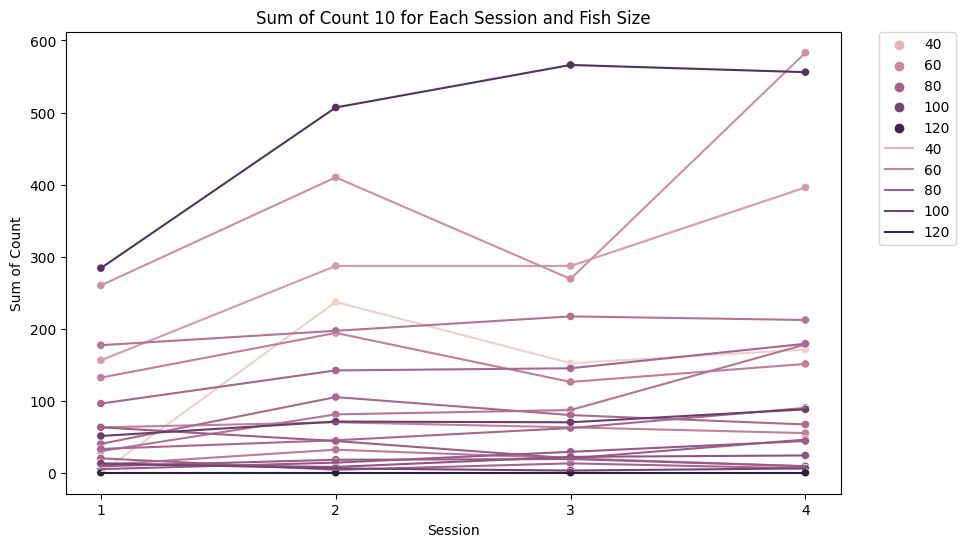

In [65]:
# Plotting
fig= plt.figure(figsize=(10, 6))
sns.scatterplot(x='session', y='count_10_all', hue='fish_sz', data=fish_by_session)
sns.lineplot(x='session', y='count_10_all', hue='fish_sz', data=fish_by_session)
plt.title('Sum of Count 10 for Each Session and Fish Size')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Session')
plt.ylabel('Sum of Count')
plt.show()
